<a href="https://colab.research.google.com/github/cristiandarioortegayubro/BDS/blob/main/modulo.08/Aplicaci%C3%B3n_LSTM_Milk_Production.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
<img src="https://github.com/cristiandarioortegayubro/BDS/blob/main/images/Logo%20BDS%20Horizontal%208.png?raw=true">
</p>

Ejemplo extraído de https://www.geeksforgeeks.org/long-short-term-memory-lstm-rnn-in-tensorflow/

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/cristiandarioortegayubro/BDS/main/datasets/monthly_milk_production.csv",index_col='Date',parse_dates=True)
df.index.freq = 'MS'

In [4]:
df

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1975-08-01,858
1975-09-01,817
1975-10-01,827


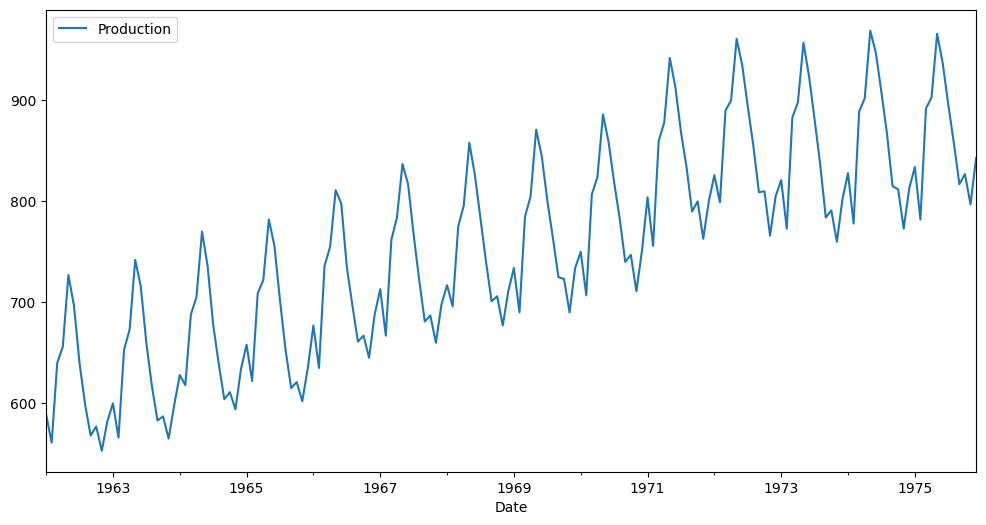

In [5]:
# Plotting graph b/w production and date
df.plot(figsize=(12, 6));


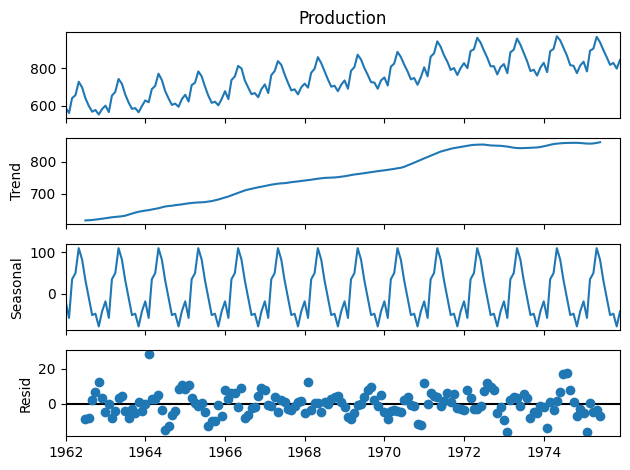

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
results = seasonal_decompose(df['Production'])
results.plot();

In [7]:
train = df.iloc[:156]
test = df.iloc[156:]

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [9]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train,
                                scaled_train,
                                length=n_input,
                                batch_size=1)
X, y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train,
                                scaled_train,
                                length=n_input,
                                batch_size=1)

Given the Array: 
[0.08653846 0.01923077 0.20913462]
Predict this y: 
 [[0.24759615]]


In [10]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu',
               input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()
model.fit(generator, epochs=5)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
144/144 [==============================] - 3s 8ms/step - loss: 0.0501
Epoch 2/5
144/144 [==============================] - 1s 9ms/step - loss: 0.0228
Epoch 3/5
144/144 [==============================] - 1s 6ms/step - loss: 0.0129
Epoch 4/5
144/144 [==============================] - 1s 6ms/step - loss: 0.0114
Epoch 5/5
144/144 [==============================] - 1s 7ms/step - loss: 0.0050


<br>
<br>
<p align="center"><b>
💗
<font color="DeepPink">
Hemos llegado al final de nuestro colab...
</font>
</p>
<br>
<p align="center">
<img src="https://github.com/cristiandarioortegayubro/BDS/blob/main/images/Logo%20BDS%20Horizontal%208.png?raw=true">
</p>

---